<a href="https://colab.research.google.com/github/Sudheendra-RD/CNN/blob/main/CarBrandClassifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob

In [ ]:
image_size = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/CNN/car_train'
test_path = '/content/drive/MyDrive/Colab Notebooks/CNN/car_test'

In [ ]:
vgg19 = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/CNN/car_train/*')
len(folders)

2

In [ ]:
flatten = Flatten()(vgg19.output)

In [ ]:
output_layer = Dense(len(folders), activation='sigmoid')(flatten)

In [ ]:
model = Model(inputs = vgg19.input, outputs = output_layer)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/car_train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/car_test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15 images belonging to 2 classes.


In [ ]:
fit = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
2/2 [==============================] - 96s 26s/step - loss: 0.6528 - accuracy: 0.6552 - val_loss: 0.7480 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 46s 29s/step - loss: 0.5756 - accuracy: 0.7759 - val_loss: 0.5300 - val_accuracy: 0.8000
Epoch 3/10
2/2 [==============================] - 46s 29s/step - loss: 0.3845 - accuracy: 0.8793 - val_loss: 0.5877 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 46s 29s/step - loss: 0.3590 - accuracy: 0.9310 - val_loss: 0.4463 - val_accuracy: 0.7333
Epoch 5/10
2/2 [==============================] - 46s 29s/step - loss: 0.2904 - accuracy: 0.9310 - val_loss: 0.5293 - val_accuracy: 0.7333
Epoch 6/10
2/2 [==============================] - 46s 29s/step - loss: 0.2794 - accuracy: 0.9483 - val_loss: 0.4097 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 46s 29s/step - loss: 0.1845 - accuracy: 0.9828 - val_loss: 0.4464 - val_accuracy: 0.8000
Epoch 8/10
2/2 [===========

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/CNN/CNN_VGG19.h5')

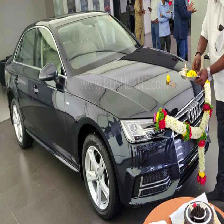

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN/audi.jpg', target_size=(224,224))
img

In [ ]:
val = image.img_to_array(img)

In [ ]:
val = val/255
val.shape

(224, 224, 3)

In [ ]:
val = np.expand_dims(val, axis=0)
val_data = preprocess_input(val)
val_data.shape

(1, 224, 224, 3)

In [ ]:
val_result = model.predict(val_data)

In [ ]:
list(np.argmax(val_result, axis=1))

[1]